# Analyzing BBC Arabic News Youtube Channel


Please be sure to read the instructions carefully!
 
>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Data Exploration

The BBC Arabic News Youtube channel, as reported in 23 July 2018, has more than 844K subscribers and a total of more than 270 milion views. It has 50 playlists and has uploaded 24377 videos.

In this project we sampled 2619 videos from the different 50 playlists.<br>
The dataset for this project can be found in the files; `playlists.csv`, `videos.csv`, and `categories.csv`.

Run the code block below to load the videos dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib notebook

# Load the wholesale customers dataset
try:
    playlists = pd.read_csv("youtubeData/playlists.csv", sep=';')
    videos = pd.read_csv("youtubeData/videos.csv", sep=';')
    print("The playlists data set has {} samples with {} features each.".format(*playlists.shape))
    print("The videos data set has {} samples with {} features each.".format(*videos.shape))
    categories = pd.read_csv("youtubeData/categories.csv", sep=';')
    print("The categories data set has {} samples with {} features each.".format(*categories.shape))
except Exception as e:
    print (e)
    print("Dataset could not be loaded. Is the dataset missing?")


la = pd.read_csv("labels.csv", sep=',')
print(type(la))

The playlists data set has 50 samples with 5 features each.
The videos data set has 2630 samples with 11 features each.
The categories data set has 32 samples with 2 features each.
<class 'pandas.core.frame.DataFrame'>


In [2]:
# show playlists sample data
playlists.head(2)

,playlistId,title,description,publishedAt,itemCount
0,PL63lwGZ_8vsloyjQiFZ3eKpzOqgsJ7BRA,تقارير سينما,حسام عاصي يقدم تقارير سينمائية ومقابلات من نجو...,2018-06-19T09:56:12.000Z,14
1,PL63lwGZ_8vslH7RneOfgvC6tIU5aFTloc,صندوق النغم,NaN,2018-02-22T15:46:47.000Z,3


## Getting Started

In this project, we will analyze a dataset containing data on various videos of the BBC Arabic News Youtube channel. One goal of this project is to best describe the variation in the different types of videos and playlists and to come up with new insights about the data to help enhancing the content and the reachness to viewres. Doing so would equip the channel with insight into the "what" and "when" of delivering the content.



In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    playlists = pd.read_csv("youtubeData/playlists.csv", sep=';')
    videos = pd.read_csv("youtubeData/videos.csv", sep=';')
    print("The playlists data set has {} samples with {} features each.".format(*playlists.shape))
    print("The videos data set has {} samples with {} features each.".format(*videos.shape))
    categories = pd.read_csv("youtubeData/categories.csv", sep=';')
    print("The categories data set has {} samples with {} features each.".format(*categories.shape))
except Exception as e:
    print (e)
    print("Dataset could not be loaded. Is the dataset missing?")

The playlists data set has 50 samples with 5 features each.
The videos data set has 2630 samples with 11 features each.
The categories data set has 32 samples with 2 features each.


In [4]:
# show videos sample data
videos.head(2)

,title,description,publishedAt,duration,playlistID,categoryId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
0,رئيس استوديوهات مارفيل يكشف عن التحضير لصنع في...,للمزيد من تقارير حسام عاصي السينمائية:\n https...,2018-07-26T07:42:44.000Z,PT10M2S,PL63lwGZ_8vsloyjQiFZ3eKpzOqgsJ7BRA,25,1356,31,4,0,4
1,علي صوفان، عميل الأف بي آي اللبناني الاصل، يتح...,للمزيد من تقارير حسام عاصي السينمائية:\n https...,2018-07-23T06:07:41.000Z,PT10M3S,PL63lwGZ_8vsloyjQiFZ3eKpzOqgsJ7BRA,25,815,14,6,0,3


In [5]:
# show categories sample data
categories.head()

,categoryId,name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


## ** Featureset Exploration **

* Understanding the "playlists" dataset features:
 - **playlistId**: the playlist id.
 - **title**: the title of the playlist.
 - **description**: the description of the playlist.
 - **publishedAt**: the date and time the playlist was published.
 - **itemCount**: the number of videos in the playlist.

* Video features:
 - **title**: the title of the video.
 - **description**: the description of the video.
 - **publishedAt**: the date and time the video was published.
 - **duration**: the duration of the videos in ISO 8601 Format.
 - **playlistID**: the playlist id that this video beolngs to or None if not applicable.
 - **viewCount**: the number of views of the videos.
 - **likeCount**: the number of likes of the videos.
 - **dislikeCount**: the number of dislikes of the videos.
 - **favoriteCount**: the number of times this video was added to a users' favorits list.
 - **commentCount**: the number of comments on the videos.

* Categories features:
 - **categoryId**: the id of the category.
 - **name**: the name of the category.
                        

                        
For the purposes of this project, we will exclude  textual features from the direct analysis. However we will keep the `title` features to know what kind of playlists and videos we are analyizing.

For the playlist dataset, the feature`'description'` will be excluded.<br><br>
For the videos dataset, the feature`'description'` will be excluded. Also, the feature `'favoriteCount'` will be excluded in the analysis as all its values are zeros, so it wouldn't provide any useful information in this context.

In [6]:
# drop features from playlists data
playlists.drop(['description'], axis = 1, inplace = True)

# drop features from videos data
videos.drop(['description', 'favoriteCount'], axis = 1, inplace = True)

print("The playlists data set has {} samples with {} features each.".format(*playlists.shape))
print("The videos data set has {} samples with {} features each.".format(*videos.shape))

The playlists data set has 50 samples with 4 features each.
The videos data set has 2630 samples with 9 features each.


### Converting Dates

- Converting the '`publishedAt`' into Standard Pandas Data and creating new columns for each category.


In [7]:
# changes to the playlists publish date
playlists["publishedAt"]=pd.to_datetime(playlists["publishedAt"])
playlists["publish_Year"]=playlists["publishedAt"].apply(lambda time:time.year)
playlists["publish_Month"]=playlists["publishedAt"].apply(lambda time:time.month)
playlists["publish_Day"]=playlists["publishedAt"].apply(lambda time:time.day)
playlists["publish_Day_of_Week"]=playlists["publishedAt"].apply(lambda time:time.dayofweek)
playlists["publish_Hour"]=playlists["publishedAt"].apply(lambda time:time.hour)

# changes to the videos publish date
videos["publishedAt"]=pd.to_datetime(videos["publishedAt"])
videos["publish_Year"]=videos["publishedAt"].apply(lambda time:time.year)
videos["publish_Month"]=videos["publishedAt"].apply(lambda time:time.month)
videos["publish_Day"]=videos["publishedAt"].apply(lambda time:time.day)
videos["publish_Day_of_Week"]=videos["publishedAt"].apply(lambda time:time.dayofweek)
videos["publish_Hour"]=videos["publishedAt"].apply(lambda time:time.hour)

# Creating a map to map days numbers to day names.
# We're Using this Dictionary to Map our column
map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
playlists["publish_Day_of_Week"]=playlists["publish_Day_of_Week"].map(map)
videos["publish_Day_of_Week"]=videos["publish_Day_of_Week"].map(map)

# drop original publish dates
playlists.drop(['publishedAt'], axis = 1, inplace = True)
videos.drop(['publishedAt'], axis = 1, inplace = True)

# display sample data
playlists.head(2)



,playlistId,title,itemCount,publish_Year,publish_Month,publish_Day,publish_Day_of_Week,publish_Hour
0,PL63lwGZ_8vsloyjQiFZ3eKpzOqgsJ7BRA,تقارير سينما,14,2018,6,19,Tue,9
1,PL63lwGZ_8vslH7RneOfgvC6tIU5aFTloc,صندوق النغم,3,2018,2,22,Thu,15


### Converting Time (duration)

- Converting the '`duration`' of video from ISO 8061 format and rerepresenting it with seconds.



In [8]:
# Rerepresenting video duration into seconds
import isodate
videos['duration'] = videos['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())
videos.head(2)

,title,duration,playlistID,categoryId,viewCount,likeCount,dislikeCount,commentCount,publish_Year,publish_Month,publish_Day,publish_Day_of_Week,publish_Hour
0,رئيس استوديوهات مارفيل يكشف عن التحضير لصنع في...,602.0,PL63lwGZ_8vsloyjQiFZ3eKpzOqgsJ7BRA,25,1356,31,4,4,2018,7,26,Thu,7
1,علي صوفان، عميل الأف بي آي اللبناني الاصل، يتح...,603.0,PL63lwGZ_8vsloyjQiFZ3eKpzOqgsJ7BRA,25,815,14,6,3,2018,7,23,Mon,6


### Replacing Cateogry IDs with Category Names


In [9]:
# create a map from h ID to category name
category_map = {}
for index, row in categories.iterrows():
    category_map[row['categoryId']] = row['name']

print (category_map[10])
# apply mapping
videos['category'] = videos['categoryId'].map(category_map)
# drop category ID
videos.drop(['categoryId'], axis = 1, inplace = True)
videos.head(2)

Music


,title,duration,playlistID,viewCount,likeCount,dislikeCount,commentCount,publish_Year,publish_Month,publish_Day,publish_Day_of_Week,publish_Hour,category
0,رئيس استوديوهات مارفيل يكشف عن التحضير لصنع في...,602.0,PL63lwGZ_8vsloyjQiFZ3eKpzOqgsJ7BRA,1356,31,4,4,2018,7,26,Thu,7,News & Politics
1,علي صوفان، عميل الأف بي آي اللبناني الاصل، يتح...,603.0,PL63lwGZ_8vsloyjQiFZ3eKpzOqgsJ7BRA,815,14,6,3,2018,7,23,Mon,6,News & Politics


## Converting Data Frame Columns into Suitable Format

In [10]:
columns =["viewCount likeCount dislikeCount commentCount".split()]
for column in columns:
    videos[column] = videos[column].astype(int)


## ** Statistical description **



Run the code block below to observe a statistical description of the the videos dataset.<br>

In [11]:
# select videos data with only the 'statistics' features
reduced_videos_data = videos[['viewCount', 'likeCount', 'dislikeCount', 'commentCount', 'duration']]

print ("videos_data statistical description:")
# Display a description of the videos dataset
display(reduced_videos_data.describe())


videos_data statistical description:


,viewCount,likeCount,dislikeCount,commentCount,duration
count,2.630000e+03,2630.000000,2630.000000,2630.000000,2630.000000
mean,2.654969e+04,152.742205,33.952852,36.225095,861.270342
std,1.472030e+05,926.195917,269.751505,194.380915,953.080470
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,8.750000e+02,5.000000,1.000000,0.000000,147.250000
50%,1.923500e+03,16.000000,3.000000,2.000000,477.000000
75%,6.471000e+03,41.000000,9.000000,8.000000,1384.250000
max,3.641909e+06,22092.000000,11290.000000,5261.000000,6552.000000


Here we find that the `statistics` features  exhibit a wide degree of variability especially `viewCount`, where the standard deviations of high values, and the range of values between the minimum and the maximum is also high.

### Feature Relevance
One interesting thought to consider is if one (or more) of the features is actually relevant for understanding viewers activity. We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, we implement the following:
 - Assigning `new_data` a copy of the data by removing a feature.
 - Splitting the dataset into training and testing sets.
   - Using the removed feature as the target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Using a decision tree regressor and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
def check_relevance(feature):
    # drop input feature and non numeric features.
    feature_name = feature
    new_data = reduced_videos_data.drop(feature, axis = 1)
    feature = pd.DataFrame(reduced_videos_data.loc[:, feature])

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, feature, test_size = 0.25, random_state = 0)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 8)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print('R^2 of the prediction for \"{}\" feature: {}'.format(feature_name, score))

for feature in ['viewCount', 'likeCount', 'dislikeCount', 'commentCount', 'duration']:
    check_relevance(feature)

R^2 of the prediction for "viewCount" feature: -1.1185493773784914
R^2 of the prediction for "likeCount" feature: 0.7754099408730923
R^2 of the prediction for "dislikeCount" feature: 0.1333160776746366
R^2 of the prediction for "commentCount" feature: -0.4548946313806503
R^2 of the prediction for "duration" feature: -0.44591266815100133


From the coefficient of determination, `R^2`, reported above, we found that the number of likes got a high R^2 score of 77%, which means that it can be explained by the other features, thereby making it not necessary for identifying viewers activity.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each featuref present in the data. If we found that the feature we attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others.

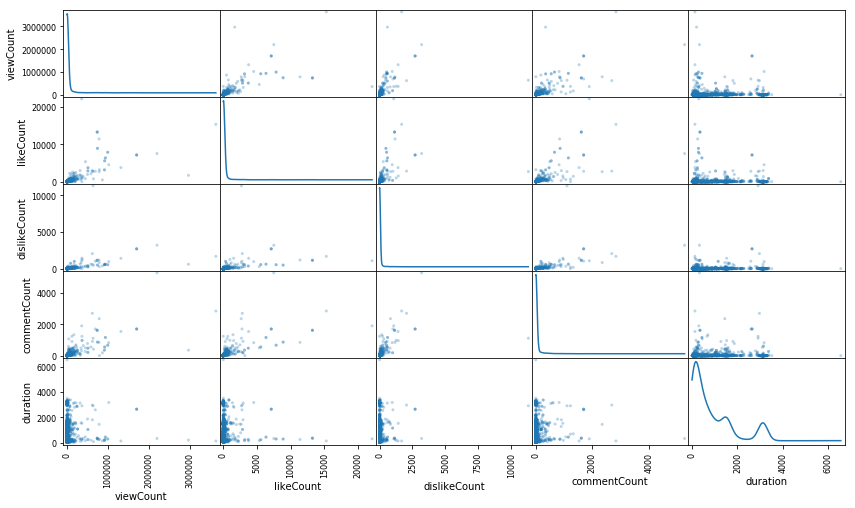

In [13]:
# Produce a scatter matrix for each pair of features in the data\n",
pd.plotting.scatter_matrix(reduced_videos_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Visualization:  Correlations

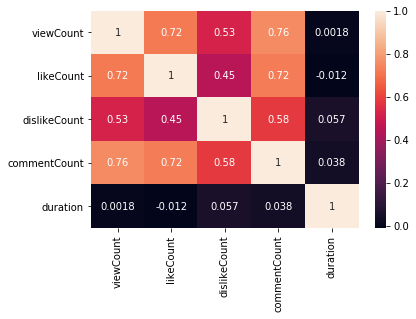

In [14]:
# show correlation betweem video statistics features
sb.heatmap(reduced_videos_data.corr(), annot=True)


* For the correlation between features, by examining the heatmap we find:
 1. A strong linear correlation with a correlation coefficient of 76% between the number of views and the number of comments as the video gets more reactions.
 2. A high positive correlation coefficient of 0.72 between the number of views and the number of likes.


- By looking at the scattering matrix we can find that the data isn't normally distributed and the distribution of the data is highly skewed with the majority of the data points lie near the origin.


## Visualization: Trending categories

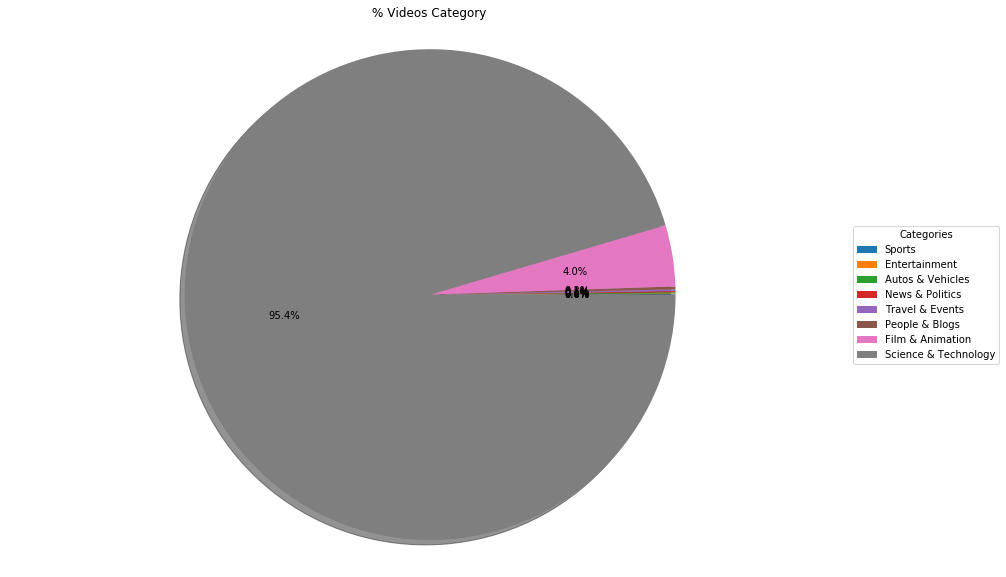

In [15]:
# Show the Number of Videos per Category
ser_data = pd.value_counts(videos['category'], ascending=True)
labels = set(videos['category'].values.tolist())
explode = (0,1,2,3,5,6,0,0)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
wedges, texts, autotexts = ax.pie(ser_data, autopct='%1.1f%%',
        shadow=True)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.legend(wedges, labels,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("% Videos Category")
plt.show()

Intuitively, The dominating category is 'News & Politics'. The channel also uploads a small number of videos in the category of 'People and Blogs', and rarely uploads entertainment videos.

## Visualization: Most watched playlists

First we need to know the variance in the number of the playlists data items:

In [16]:
# Display a description of the playlists dataset
print ("playlists data statistical description:")
display(playlists[['itemCount']].describe());


playlists data statistical description:


,itemCount
count,50.000000
mean,53.280000
std,91.362262
min,1.000000
25%,5.250000
50%,10.000000
75%,41.000000
max,346.000000


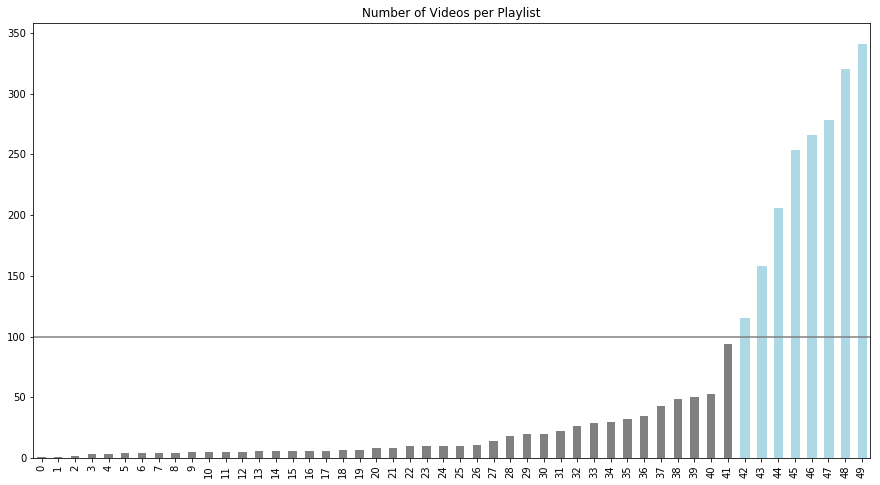

In [17]:
# PLot the Number of Videos per Playlist
s = pd.value_counts(videos['playlistID'], ascending=True)
ax = s.plot.bar(title="Number of Videos per Playlist", figsize=(15,8), color="grey");
_ = ax.set_xticklabels(videos['playlistID'].index.tolist())
bars = ax.get_children()
plt.axhline(y = 100, color = 'grey')
count =0
for b in bars:
    if isinstance(b, plt.Rectangle):
        if b.get_height() >= 100:
            b.set_color("lightblue")


As we can see, there's a big variance in the 'itemCount', and the standard deviation is a relatively high value. 
As we saw earlier in the *correlation heatmap*, as the `itemCount` increases the number of views increases, so it's not fair to compare playlists with large differences in the number of videos. So, we will only consider playlist of high `itemCount`.

In [18]:
# map playlist id to playlist title
from bidi.algorithm import get_display
import arabic_reshaper
def get_title(x):
    for index, row in playlists.iterrows():
        if row['playlistId'] == x:
            reshaped_text = arabic_reshaper.reshape(row['title'])
            title = get_display(reshaped_text)
            return title
    return None


<Figure size 576x576 with 0 Axes>

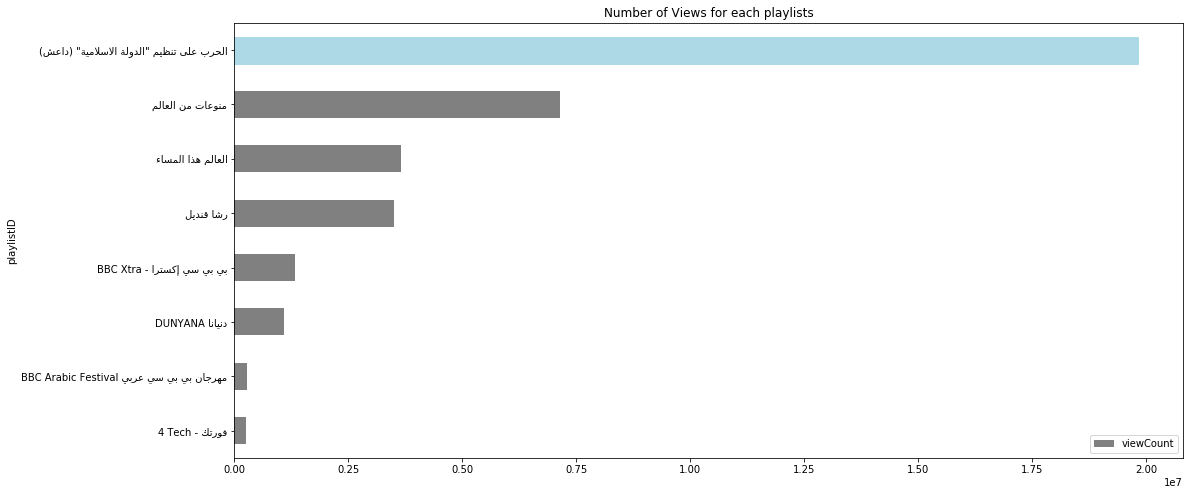

<Figure size 576x576 with 0 Axes>

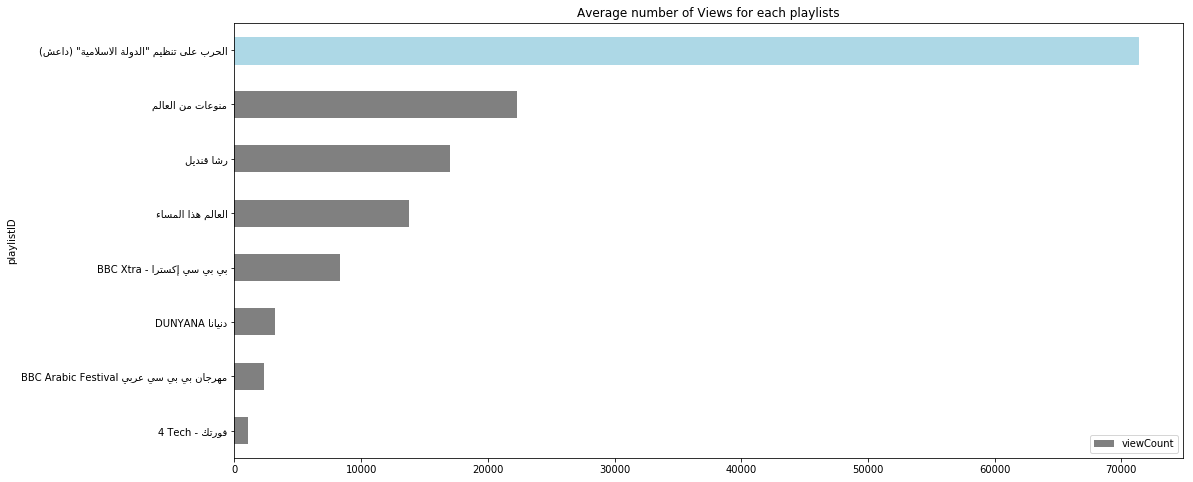

In [19]:
# Here we will consider playlists with itemCount' more than 100
new_playlists = playlists.loc[playlists['itemCount'] > 100]
new_videos = videos.loc[videos['playlistID'].isin(new_playlists['playlistId'])]

# plot the Number of Views per playlists
plt.figure(figsize=(8,8))
values = new_videos.groupby('playlistID').sum().sort_values(by="viewCount")
values.index = values.index.map(get_title)
values_plot = values.plot.barh(y='viewCount', figsize=(17,8), color="grey")
values_plot.get_children()[7].set_color("lightblue")
values_plot.set_yticklabels(values_plot.get_yticklabels())
plt.title("Number of Views for each playlists")
sb.set_context(font_scale=1)

# plot the average number of Views for each playlists
plt.figure(figsize=(8,8))
values = new_videos.groupby('playlistID').mean().sort_values(by="viewCount")
values.index = values.index.map(get_title)
values_plot = values.plot.barh(y='viewCount', figsize=(17,8), color="grey")
values_plot.get_children()[7].set_color("lightblue")
values_plot.set_yticklabels(values_plot.get_yticklabels())
plt.title("Average number of Views for each playlists")
sb.set_context(font_scale=1)

There's a big gap between the first rank and the second rank playlists in terms of the total and the average number of views. This gap gets smaller between the other subsequent playlists, which means that the first playlist has the highest gap away from other playlists and was highly trending. 


###### Viewers Reaction
  
Now, we need to know for these highly viewed playlists, how people react to the videos.

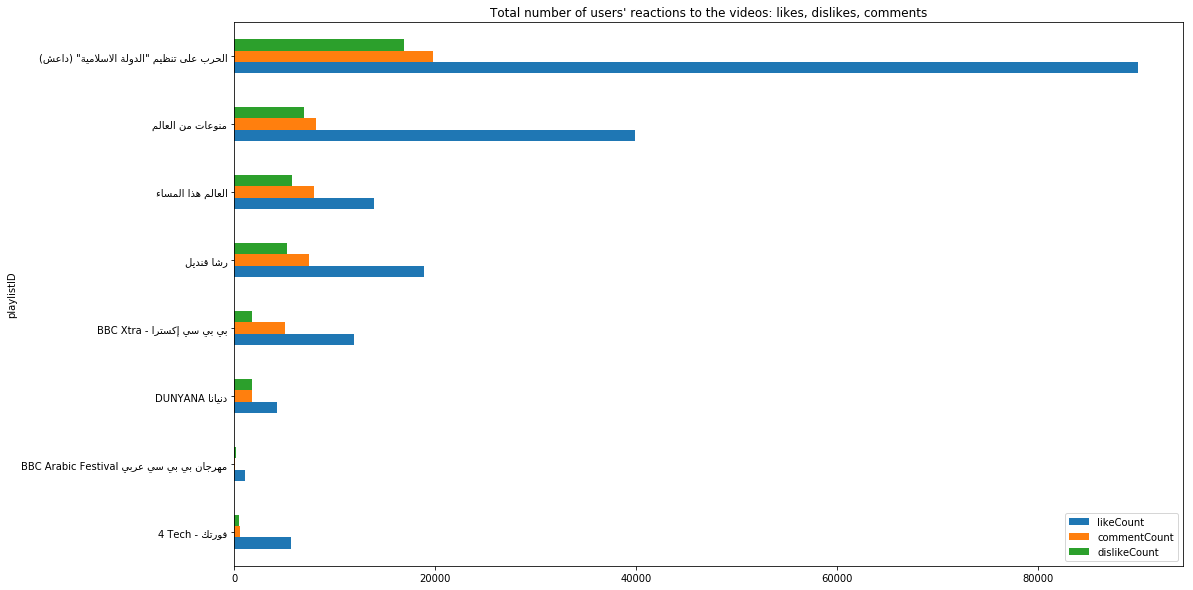

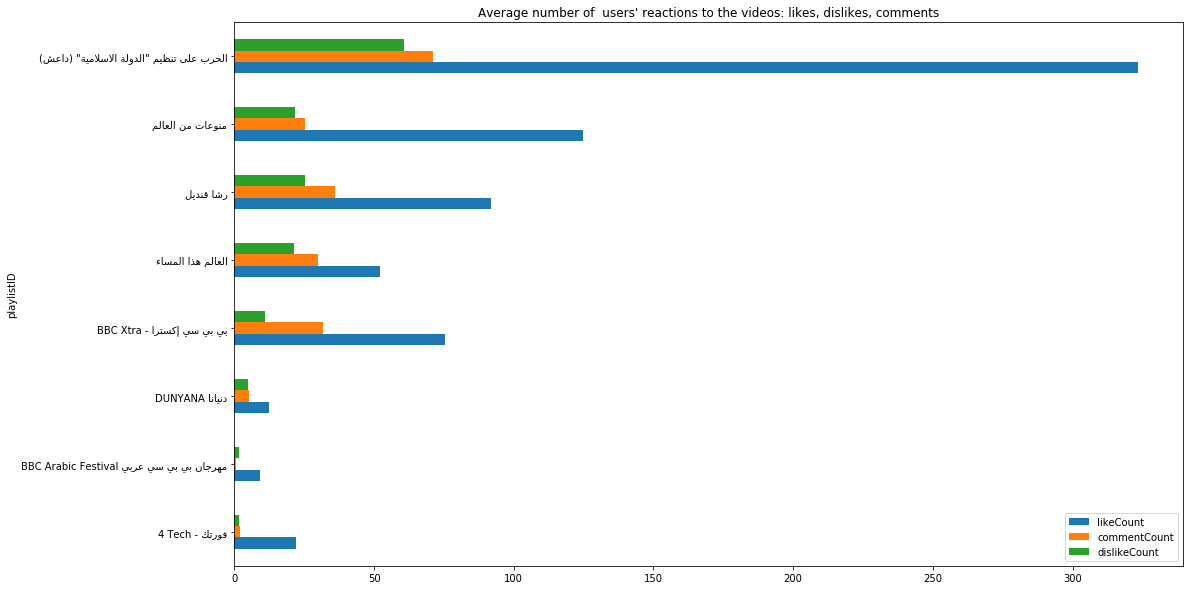

In [20]:
# Here we will consider users reactions to the trending playlists: likes, dislikes, comments.
values = new_videos.groupby('playlistID').sum().sort_values(by="viewCount")
values.index = values.index.map(get_title)
values = values[['likeCount','commentCount', 'dislikeCount']].plot.barh(figsize=(17,10))
values.set_yticklabels(values.get_yticklabels())
plt.title("Total number of users' reactions to the videos: likes, dislikes, comments")
sb.set_context(font_scale=1)


values = new_videos.groupby('playlistID').mean().sort_values(by="viewCount")
values.index = values.index.map(get_title)
values = values[['likeCount','commentCount', 'dislikeCount']].plot.barh(figsize=(17,10))
values.set_yticklabels(values.get_yticklabels())
plt.title("Average number of  users' reactions to the videos: likes, dislikes, comments")
sb.set_context(font_scale=1)


From the figures above, we can find that most of the viewers reacted positively to these playlists.<br> However, they like these videos but they not commenting on it as many.

## Visualization: Top 10 most watched videos

<Figure size 576x576 with 0 Axes>

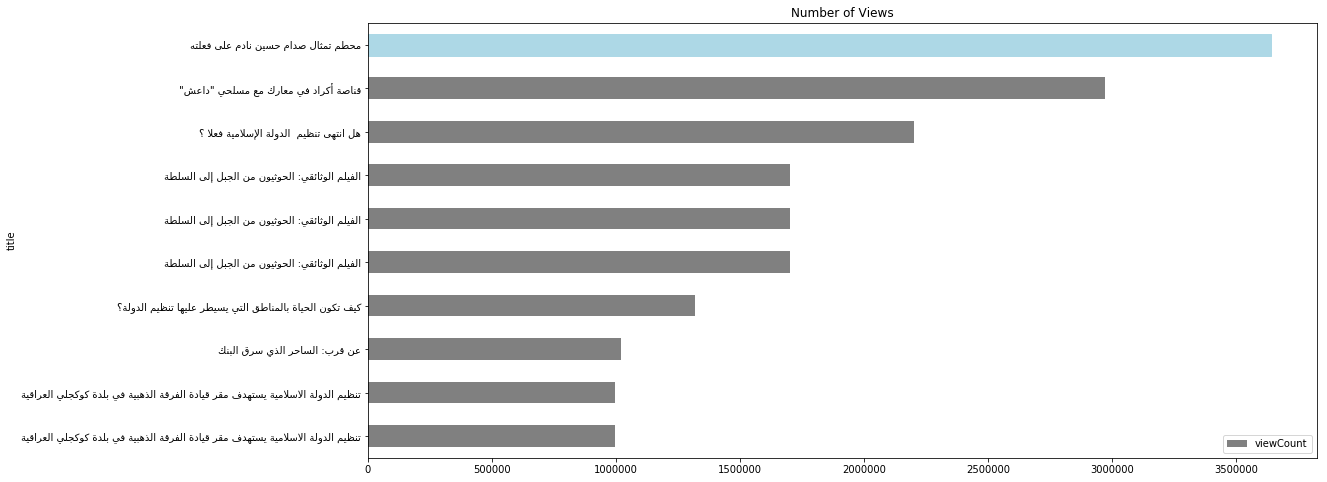

In [21]:
# plot the Number of Views per top ten videos
plt.figure(figsize=(8,8))
values = videos.sort_values(by="viewCount",ascending=False).head(10)
values = values.sort_values(by="viewCount")
# set index to video titles
values['title'] = values['title'].map(lambda x: get_display(arabic_reshaper.reshape(x)))
values.set_index("title",inplace=True)
# plot
values_plot = values.plot.barh(y='viewCount', figsize=(17,8), color="grey")
values_plot.get_children()[9].set_color("lightblue")
values_plot.set_yticklabels(values_plot.get_yticklabels())
plt.title("Number of Views")
sb.set_context(font_scale=1)

Now, we will see the corresponding playlists that these videos belong to.

In [22]:
print("Video Rank\t\tPlaylist Title")
print("---------------------------------------")
i = 0
for index, row in values.iterrows():
    pl = playlists.loc[playlists['playlistId'] == row['playlistID']]
    title = pl['title'].iloc[0]
    i +=1
    print(i,"\t\t:\t", title)


Video Rank		Playlist Title
---------------------------------------
1 		:	 الحرب على تنظيم "الدولة الاسلامية" (داعش)
2 		:	 عملية استعادة الموصل
3 		:	 سلسلة الأفلام الوثائقية عن قرب
4 		:	 الحرب على تنظيم "الدولة الاسلامية" (داعش)
5 		:	 سلسلة الأفلام الوثائقية عن قرب
6 		:	 سلسلة الأفلام الوثائقية عن قرب
7 		:	 اليمن
8 		:	 الحرب على تنظيم "الدولة الاسلامية" (داعش)
9 		:	 الحرب على تنظيم "الدولة الاسلامية" (داعش)
10 		:	 مقابلات حصرية


* Here, 4 of the top 10 most watched videos belong to the most watched playlist.

## Data Preprocessing: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`.
 - Assign the value of the 75th percentile for the given feature to `Q3`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Removing outlier data points from the dataset by adding indices to the `outliers` list.

After that, the dataset will be stored in the variable `good_data`.

**Note**: th outlier detection and removal is delayd till this section, because it could have affected the results of the 10 top most watched videos and the the most watched playlists. For most watched videos, for example, the top video may be an outlier which would be wrongly removed by the outlier removing algorithm.

In [23]:
# set of duplicate outliers
duplicates = set()
working_list = []

# For each feature find the data points with extreme high or low values
for feature in reduced_videos_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(reduced_videos_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(reduced_videos_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outliers = reduced_videos_data[~((reduced_videos_data[feature] >= Q1 - step) & (reduced_videos_data[feature] <= Q3 + step))]
    display(outliers)
    # check duplicates
    indeces = outliers.index
    duplicates.update(set(working_list) & set(indeces))
    working_list += list(indeces)

print ("Data points considered outliers for more than one feature({}):\n{}".format(len(duplicates), duplicates))        
# Select the indices for data points to remove
outliers = list(duplicates)

# Remove the outliers
good_data = videos.drop(videos.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'viewCount':


,viewCount,likeCount,dislikeCount,commentCount,duration
16,28574,51,44,3,30.0
18,36669,154,37,123,418.0
30,42755,143,44,67,285.0
31,54364,116,58,70,492.0
55,18876,99,58,65,1019.0
56,97815,280,245,128,222.0
61,19487,76,54,64,785.0
62,23314,116,54,108,185.0
63,55963,229,71,121,2592.0
65,75850,550,103,184,86.0


Data points considered outliers for the feature 'likeCount':


,viewCount,likeCount,dislikeCount,commentCount,duration
18,36669,154,37,123,418.0
22,9796,108,24,10,1743.0
30,42755,143,44,67,285.0
31,54364,116,58,70,492.0
35,8620,178,23,13,1871.0
48,14287,184,9,38,345.0
49,11423,130,24,28,1766.0
55,18876,99,58,65,1019.0
56,97815,280,245,128,222.0
62,23314,116,54,108,185.0


Data points considered outliers for the feature 'dislikeCount':


,viewCount,likeCount,dislikeCount,commentCount,duration
16,28574,51,44,3,30.0
18,36669,154,37,123,418.0
22,9796,108,24,10,1743.0
30,42755,143,44,67,285.0
31,54364,116,58,70,492.0
35,8620,178,23,13,1871.0
49,11423,130,24,28,1766.0
55,18876,99,58,65,1019.0
56,97815,280,245,128,222.0
57,10937,79,23,35,234.0


Data points considered outliers for the feature 'commentCount':


,viewCount,likeCount,dislikeCount,commentCount,duration
3,3033,92,5,26,599.0
18,36669,154,37,123,418.0
30,42755,143,44,67,285.0
31,54364,116,58,70,492.0
48,14287,184,9,38,345.0
49,11423,130,24,28,1766.0
50,12179,52,7,22,44.0
55,18876,99,58,65,1019.0
56,97815,280,245,128,222.0
57,10937,79,23,35,234.0


Data points considered outliers for the feature 'duration':


,viewCount,likeCount,dislikeCount,commentCount,duration
483,44378,850,53,263,3370.0
1046,4194,16,2,2,3265.0
1092,1349,3,3,0,3310.0
1095,2962,17,0,1,3513.0
1098,1403,8,3,0,3253.0
1099,1988,9,1,0,3381.0
1149,85158,799,52,54,3375.0
1799,44378,850,53,263,3370.0
2155,300,1,1,0,3316.0
2249,363,1,0,0,6552.0


Data points considered outliers for more than one feature(421):
{2049, 2058, 16, 18, 22, 30, 31, 35, 2091, 2094, 48, 49, 2100, 55, 56, 57, 61, 62, 63, 65, 67, 68, 69, 70, 71, 72, 73, 2123, 77, 2143, 2146, 2149, 106, 2162, 2167, 132, 135, 136, 138, 139, 144, 145, 164, 2289, 2291, 2297, 2303, 292, 2346, 2478, 431, 442, 2499, 453, 2502, 2527, 480, 481, 2530, 483, 484, 2531, 486, 488, 489, 490, 2538, 2541, 494, 495, 496, 497, 498, 493, 503, 504, 505, 2554, 509, 510, 2559, 512, 514, 515, 516, 518, 521, 522, 526, 534, 541, 542, 544, 545, 546, 549, 556, 557, 558, 562, 566, 567, 568, 570, 572, 575, 579, 588, 590, 598, 599, 606, 607, 609, 626, 629, 633, 642, 648, 653, 667, 670, 688, 694, 697, 706, 720, 724, 729, 733, 736, 738, 741, 746, 753, 755, 764, 767, 791, 797, 801, 802, 806, 812, 815, 817, 822, 825, 843, 848, 866, 873, 897, 898, 899, 902, 909, 910, 912, 917, 919, 920, 933, 934, 935, 936, 937, 939, 940, 941, 952, 953, 954, 975, 976, 984, 985, 986, 1009, 1010, 1015, 1016, 1038, 1056, 1075, 

There are 421 data points that are considered outliers for more than one feature, so, they don't represent the videos' data and they skew the results.

For the abovementioned reasons, these data points were added to the outliers list to be removed from the dataset.

Most of the outliers in YouTube may be caused by the following:
1. **Misclicks**: Users’ dexterity is not always accurate and precise. They may intend to click on a video with their pointing device but instead click on another, unrelated one. Although the user can (frustratingly) return to the previous page and try again, the damage has already been done.
2. **Clickbait** videos: One of the contributors to the outliers in users’ history is the existence of clickbait videos, which are videos that mislead users into viewing them from sensationalized thumbnails or titles.

*Ref*:<br>
https://www.sciencedirect.com/science/article/pii/S1877050917314862/pdf?md5=949e2f17641803a768cbf64e0f596fa5&pid=1-s2.0-S1877050917314862-main.pdf


## Visualization:  Publish Hours

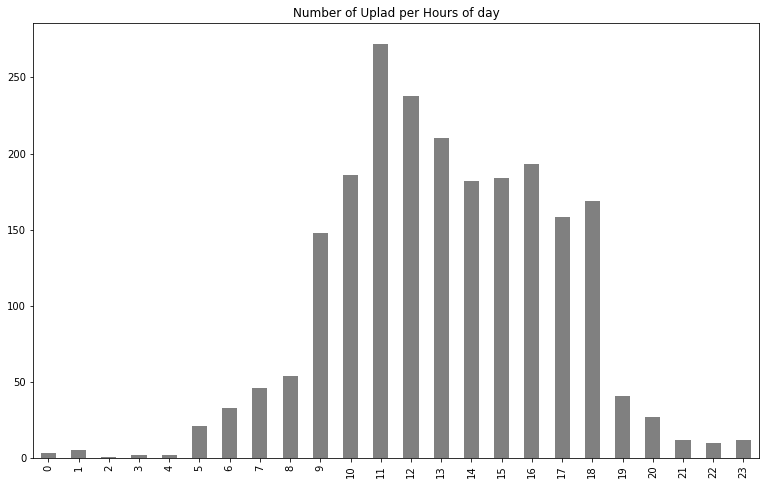

In [24]:
# Ploting the number of video uploads in different times of the days.
temp = pd.value_counts(good_data['publish_Hour']).sort_index()
temp.plot.bar(title="Number of Uplad per Hours of day", figsize=(13,8), color="grey");

- We can see that the distribution of the data is approximately normal with a little skewness, where most of the video uploads are done in the midday.

## Visualization:  Views and Publish Time

Exploring the relation between the number of views and different publication dates: Hours of the day, days of the week, days of the month, monthes of the year and through the years.

<Figure size 576x576 with 0 Axes>

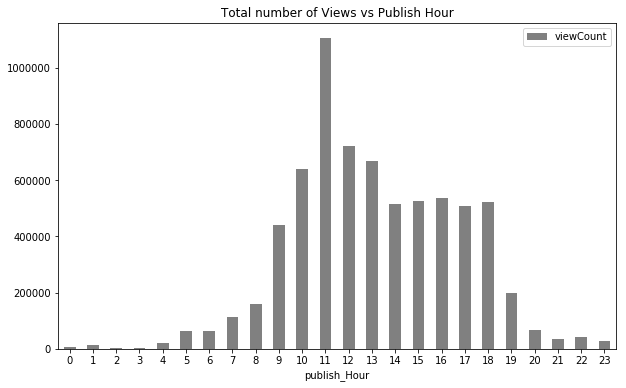

In [25]:
# Number of Views against Publish Hours
plt.figure(figsize=(8,8))
values = good_data.groupby('publish_Hour').sum().plot.bar(y='viewCount', figsize=(10,6), color="grey")
values.set_xticklabels(values.get_xticklabels(),rotation=0)
plt.title("Total number of Views vs Publish Hour")
sb.set_context(font_scale=1)



Most views are in the hours around midday, this is in line with the peak time of the upload (hours of the day), So, it seems that the viewers tend to view the most recent news in the newly uploaded videos.

<Figure size 576x576 with 0 Axes>

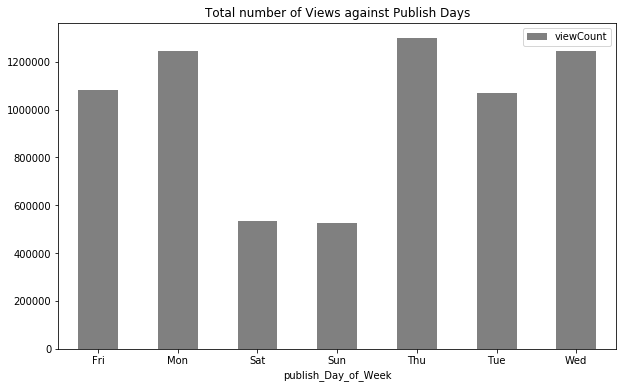

<Figure size 576x576 with 0 Axes>

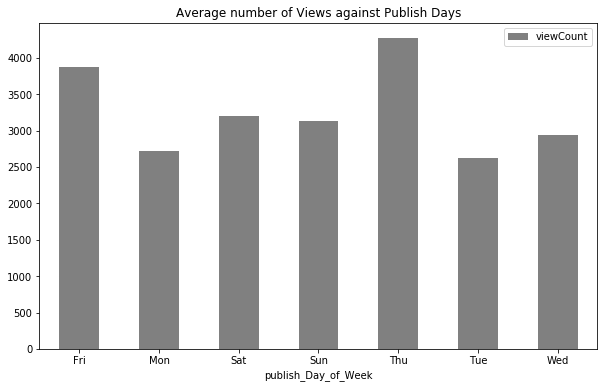

In [26]:
# TotalNumber of Views against Publish Day of week
plt.figure(figsize=(8,8))
values = good_data.groupby('publish_Day_of_Week').sum().plot.bar(y='viewCount',
                                                                 figsize=(10,6), color="grey")
values.set_xticklabels(values.get_xticklabels(),rotation=0)
plt.title("Total number of Views against Publish Days")
sb.set_context(font_scale=1)

# Average Number of Views against Publish Day of week
plt.figure(figsize=(8,8))
values = good_data.groupby('publish_Day_of_Week').mean().plot.bar(y='viewCount',
                                                                  figsize=(10,6), color="grey")
values.set_xticklabels(values.get_xticklabels(),rotation=0)
plt.title("Average number of Views against Publish Days")
sb.set_context(font_scale=1)

By looking at the two figures above, considering both the total and the average number of views, we find that 
for some days they seems to have local oultiers that may distort the mean, where the comparison between the total number of is highly defferent from the that of the averages.


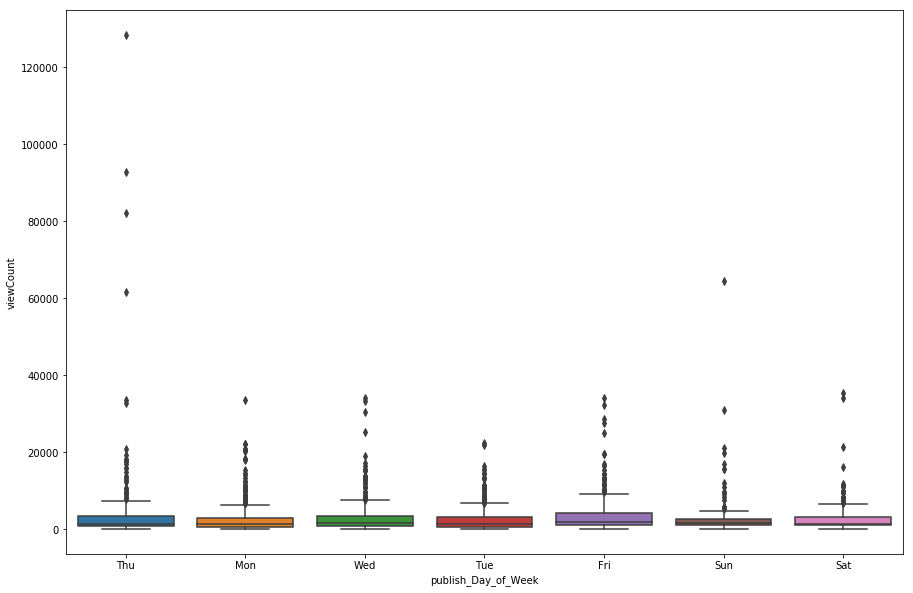

In [27]:
# check for local oultiers, by viewin a boxplot
fig, ax = plt.subplots(figsize=(15,10))
sb.boxplot(x='publish_Day_of_Week' ,y="viewCount", data=good_data)

From the figure above, we can see the existance of the aforementioned outliers, hence the initial claim was right.

It may be the case that the number of views gets higher in the middle and the end of the week, but we can't be confident of making such general statments.

<Figure size 576x576 with 0 Axes>

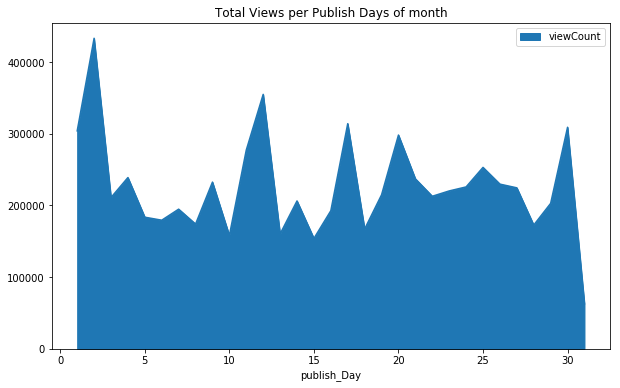

<Figure size 576x576 with 0 Axes>

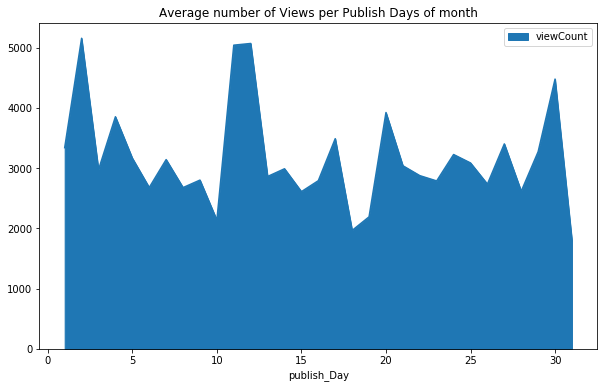

In [43]:

# Number of Views against Publish Days of month
plt.figure(figsize=(8,8))
values = good_data.groupby('publish_Day').sum().plot.area(y='viewCount', figsize=(10,6))
plt.title("Total Views per Publish Days of month")
sb.set_context(font_scale=1)

plt.figure(figsize=(8,8))
values = good_data.groupby('publish_Day').mean().plot.area(y='viewCount', figsize=(10,6))
plt.title("Average number of Views per Publish Days of month")
sb.set_context(font_scale=1)


We can say that the users' activity with the channel' content is relatively higher in the begging of the month, the middle of the month, and at the end of the month.

<Figure size 576x576 with 0 Axes>

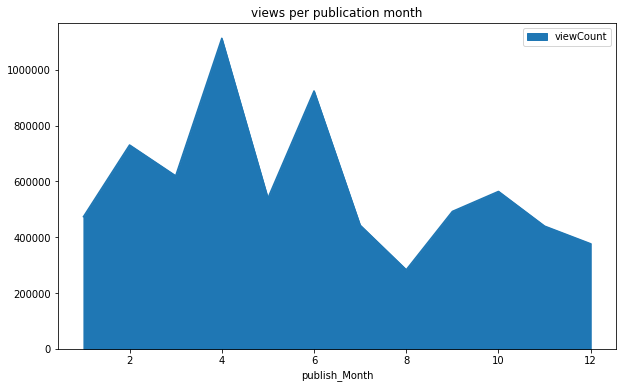

In [42]:
# Views per publication month
plt.figure(figsize=(8,8))
values = good_data.groupby('publish_Month').sum().plot.area(y='viewCount', figsize=(10,6))
plt.title("views per publication month")
sb.set_context(font_scale=1)


In general, the first half of the year seems to achive higher reachness, however, this observation might be tricky, since this views are accumalted throug different years (i.e not of a single year), besides, other factors ,like the intensity of the political situations, affect the type and importance of the news. So, we can't conclude that this is a general trend.

<Figure size 576x576 with 0 Axes>

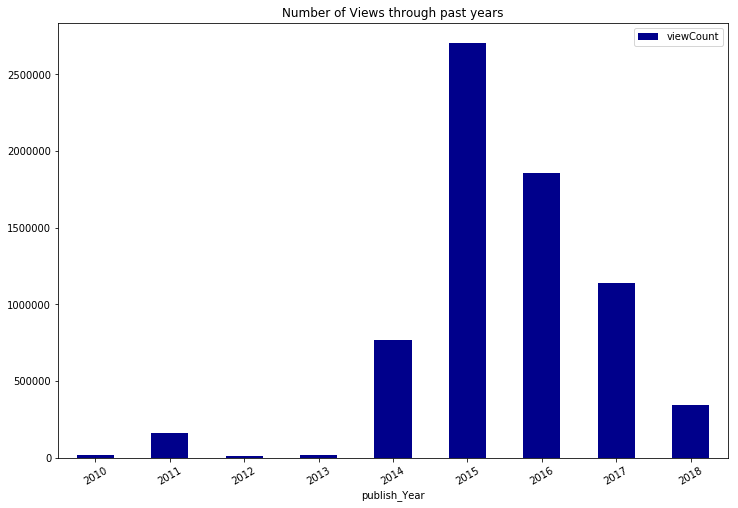

In [30]:

# Number of Views through the past years
plt.figure(figsize=(8,8))
values = good_data.groupby('publish_Year').sum().plot.bar(y='viewCount', figsize=(12,8), color="darkblue")
values.set_xticklabels(values.get_xticklabels(),rotation=30)
plt.title("Number of Views through past years")
sb.set_context(font_scale=1)


From the figure above, we find that from *2010* to *2013* the channel had very low number of views and very little exposure. Since *2014* it started to spread and the number of views started to increase, where the channel reached its peak in *2015*.
After that, it started losing viewers again, and the nubmer of views kept decreasing until *2018*.

### Exploring data of 2015

In [31]:
# Here we will consider playlists published in 2015
playlists_2015 = playlists.loc[playlists['publish_Year'] == 2015]
playlists_2015[['title', 'publish_Month']].head()

,title,publish_Month
24,حصاد العام ٢٠١٥,12
25,100 امرأة,11
26,تحدي المذيع,7
27,اصوات من فلسطين,6
28,عالم الكتب,6


<Figure size 576x576 with 0 Axes>

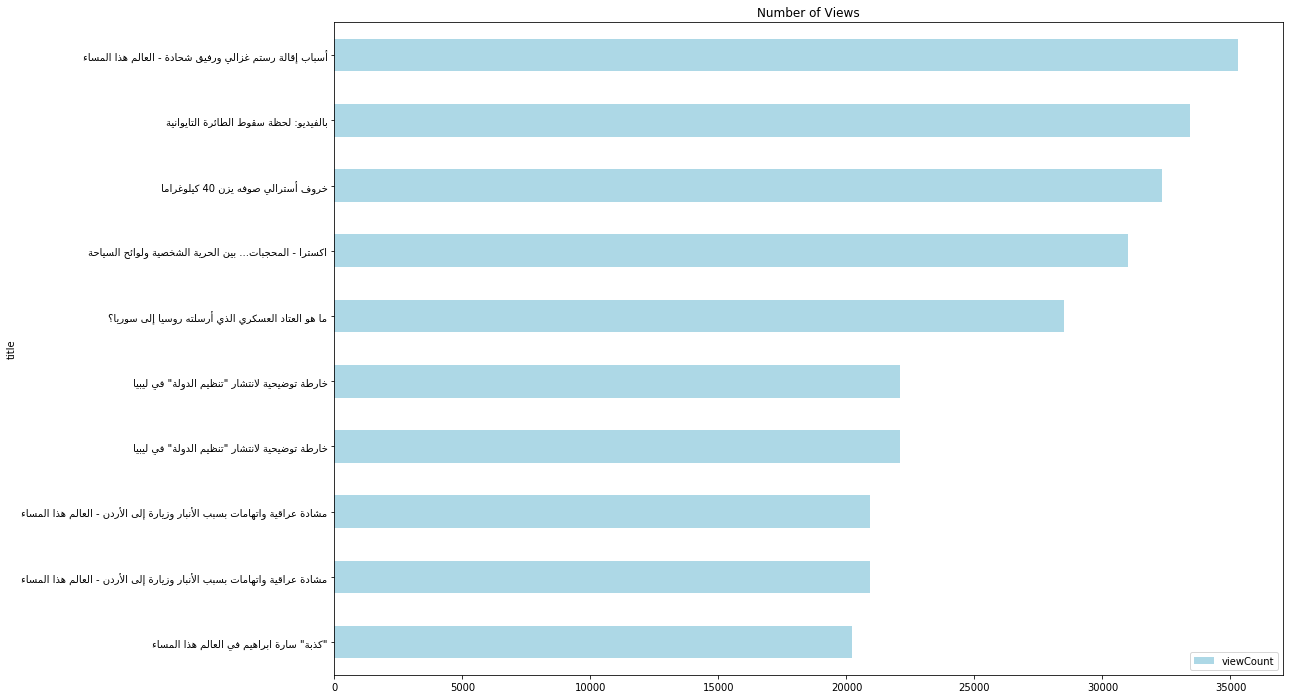

In [32]:
# select videos published in 2015
videos_of_2015 = good_data.loc[good_data['publish_Year'] == 2015]

plt.figure(figsize=(8,8))
values = videos_of_2015.sort_values(by="viewCount",ascending=False).head(10)
values = values.sort_values(by="viewCount")
# set index to video titles
values['title'] = values['title'].map(lambda x: get_display(arabic_reshaper.reshape(x)))
values.set_index("title",inplace=True)
# plot
values_plot = values.plot.barh(y='viewCount', figsize=(17,12), color="lightblue")
values_plot.set_yticklabels(values_plot.get_yticklabels())
plt.title("Number of Views")
sb.set_context(font_scale=1)

### Current Year Evaluation

First, we will explore what are the playlists published in 2018.

In [33]:
# Here we will consider playlists published in 2018
playlists_2018 = playlists.loc[playlists['publish_Year'] == 2018]
playlists_2018[['title', 'publish_Month']].head()

,title,publish_Month
0,تقارير سينما,6
1,صندوق النغم,2


 Now, we need to see how the channel was doing during *2018*, and whether the number of views is going to continue its decrease or not.<br>Also, we want to see how the new playlists published in 2018 is doing.

<Figure size 576x576 with 0 Axes>

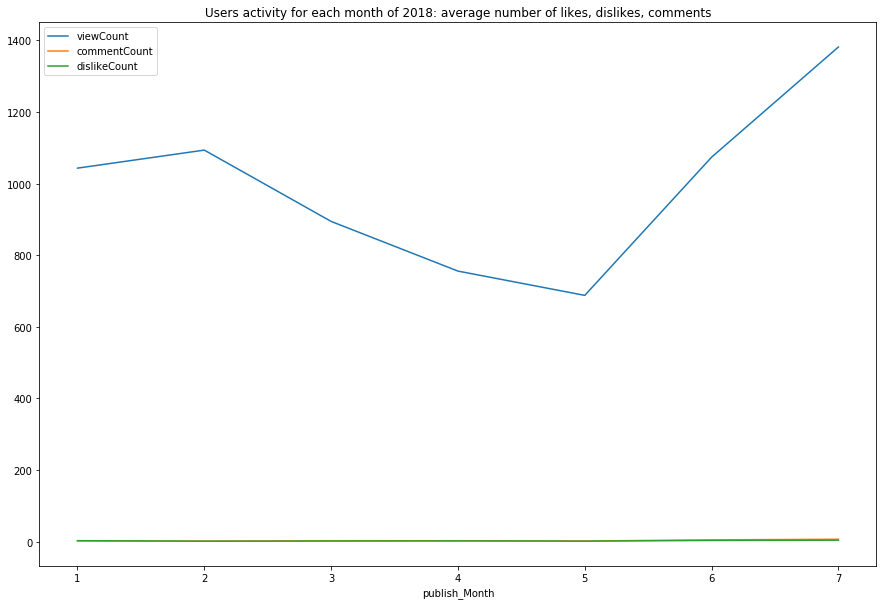

In [34]:
# select videos published in 2018
videos_of_2018 = good_data.loc[good_data['publish_Year'] >= 2018]

# plot different users activity for each month of 2018
plt.figure(figsize=(8,8))
values = videos_of_2018.groupby('publish_Month').mean()
values = values[['viewCount','commentCount', 'dislikeCount']].plot(figsize=(15,10))
months =videos_of_2018.groupby('publish_Month')['publish_Month']
plt.title("Users activity for each month of 2018: average number of likes, dislikes, comments")
sb.set_context(font_scale=1)

As we can see the users avtivity towards the channel, hence the number of views, started decreasing form `March` to `May`, where it was higher in the beginning of the year, then it started decreasing from the third month, then it increased again since `June`.

Now, we may need to investigate the two extreme cases; the month of the highest number of views and the month of the lowest number of views which are `July` and `May`, respectivley. We want to explore what makes `July` and `May` have this kind of activity.


<Figure size 576x576 with 0 Axes>

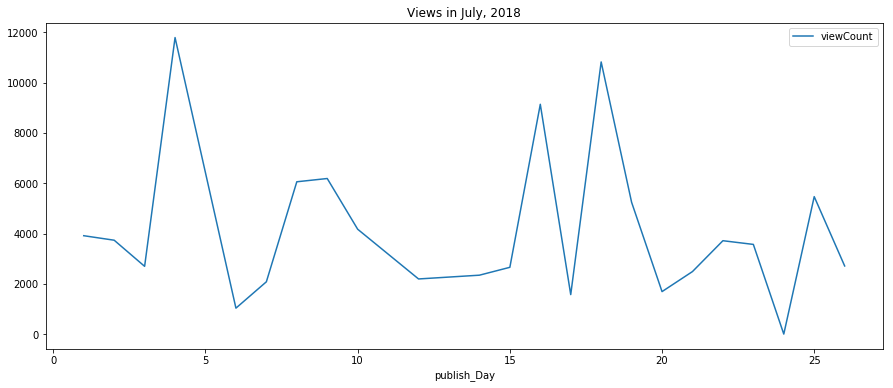

In [40]:
# select videos published in July, 2018.
July_videos = videos_of_2018.loc[videos_of_2018['publish_Month'] == 7]

# Number of Views in Jan 2018 publication month
plt.figure(figsize=(8,8))
values = July_videos.groupby('publish_Day').sum().plot.line(y='viewCount', figsize=(15,6))
plt.title("Views in July, 2018")
sb.set_context(font_scale=1)

The views in that month are not that high, there are only some days the forms affected the total views. The days that witnessed a high number of views are 4th, 16th and 18th of July. Let's see what makes these days different.

<Figure size 576x576 with 0 Axes>

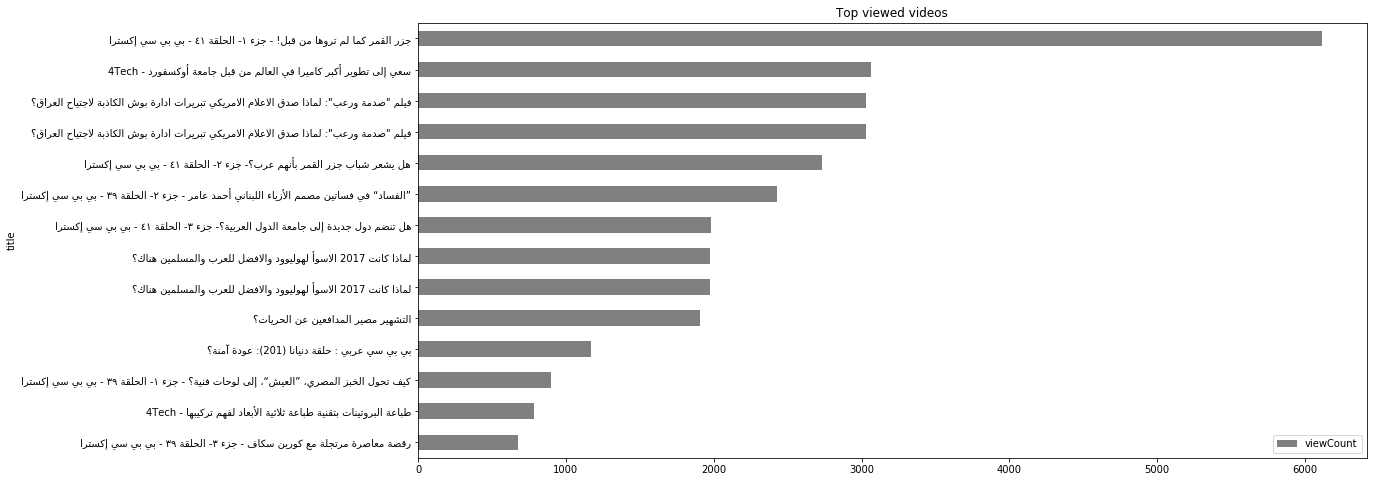

In [36]:
July_best_days = July_videos.loc[July_videos['publish_Day'].isin([4,16,18])]

plt.figure(figsize=(8,8))
values = July_best_days.sort_values(by="viewCount")
temp_values = values.sort_values(by="viewCount",ascending=False)

values['title'] = values['title'].map(lambda x: get_display(arabic_reshaper.reshape(x)))
values_plot = values.plot.barh(x='title', y='viewCount', figsize=(17,8), color="grey")
values_plot.set_yticklabels(values_plot.get_yticklabels())
plt.title("Top viewed videos")
sb.set_context(font_scale=1)

In [37]:
# show playlists for these videos
print("Video Rank\t\tPlaylist Title")
print("---------------------------------------")
i = 0
for index, row in temp_values.iterrows():
    pl = playlists.loc[playlists['playlistId'] == row['playlistID']]
    title = pl['title'].iloc[0]
    i +=1
    print(i,"\t\t:\t", title)


Video Rank		Playlist Title
---------------------------------------
1 		:	 BBC Xtra - بي بي سي إكسترا
2 		:	 4 Tech - فورتك
3 		:	 تقارير سينما
4 		:	 العالم هذا المساء
5 		:	 BBC Xtra - بي بي سي إكسترا
6 		:	 BBC Xtra - بي بي سي إكسترا
7 		:	 BBC Xtra - بي بي سي إكسترا
8 		:	 تقارير سينما
9 		:	 العالم هذا المساء
10 		:	 دنيانا DUNYANA
11 		:	 دنيانا DUNYANA
12 		:	 BBC Xtra - بي بي سي إكسترا
13 		:	 4 Tech - فورتك
14 		:	 BBC Xtra - بي بي سي إكسترا


Out of the 14 most viewed videos, six videos ,inlcuding the top one, are from the playlist `BBC Xtra` that is dominating the views, three of the other videos in it also got high ranks, which indicates that this playlist succeeded in attracting a consierable number of viewers.

For the `May` case:

<Figure size 576x576 with 0 Axes>

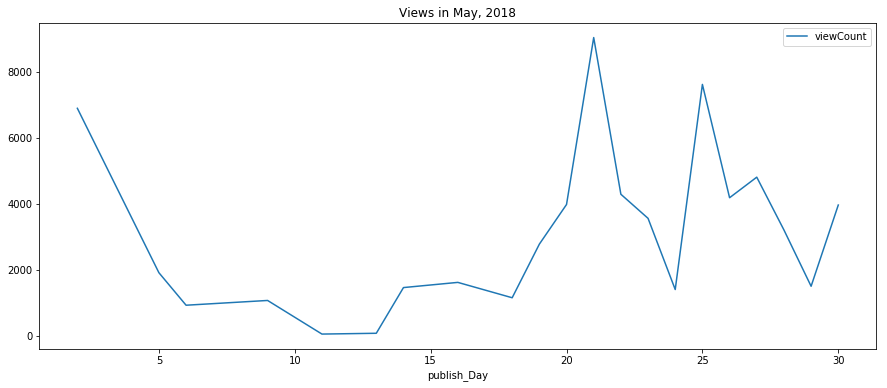

In [41]:
# select videos published in June, 2018.
May_videos = videos_of_2018.loc[videos_of_2018['publish_Month'] == 6]

# Number of Views in June, 2018 publication month
plt.figure(figsize=(8,8))
values = May_videos.groupby('publish_Day').sum().plot.line(y='viewCount', figsize=(15,6))
plt.title("Views in May, 2018")
sb.set_context(font_scale=1)

There are some days that witnessed the highest number of views, although it's not a big number, however, let's see what are the kind of videos on these days.

<Figure size 576x576 with 0 Axes>

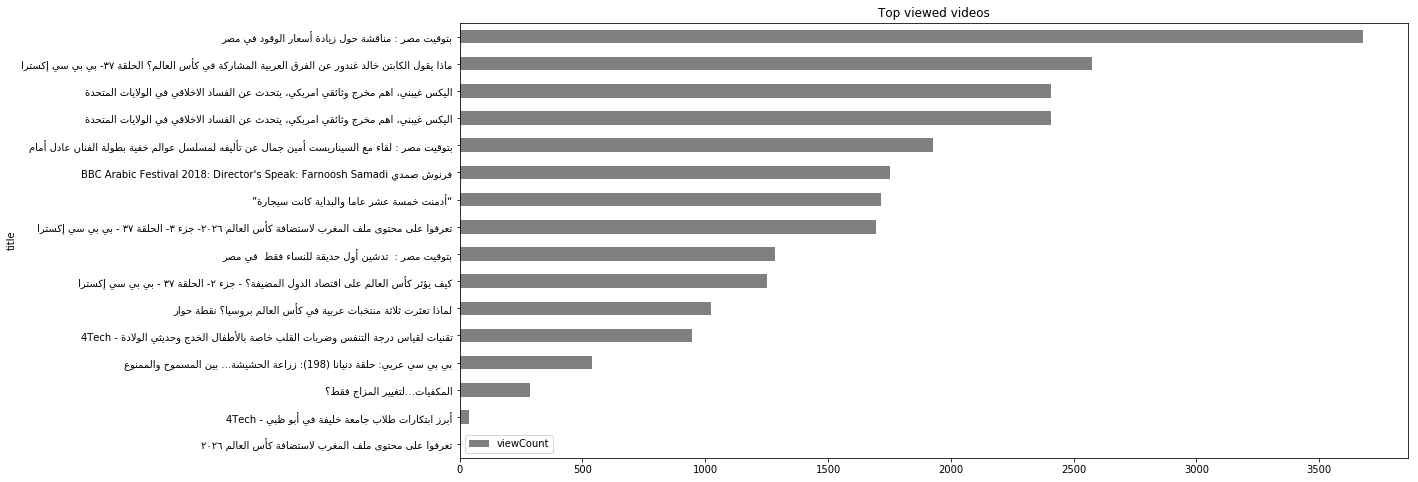

In [39]:
May_best_days = May_videos.loc[May_videos['publish_Day'].isin([2,21,25])]

plt.figure(figsize=(8,8))
values = May_best_days.sort_values(by="viewCount")
values['title'] = values['title'].map(lambda x: get_display(arabic_reshaper.reshape(x)))
values_plot = values.plot.barh(x='title', y='viewCount', figsize=(17,8), color="grey")
values_plot.set_yticklabels(values_plot.get_yticklabels())
plt.title("Top viewed videos")
sb.set_context(font_scale=1)

Here, three of these top videos are from the playlist `بتوقيت مصر` , which was trending these days.
However the rest of the month is still of moderate and low number of views compared to the other monthes.


#### Playlist of 2018
From the above summary, we notice that the playlists published in 2018 didn't have any significant contributions to the content reachness or the number of views through out the year.<br><br><br>

# Limitation

In this analyisis there were some limtations beacuse the YouTube Data API doesn't provide as many information as we want.
We lack information about 'Users' or 'Audience', a thing that if were added would've provided great benefits, For example:

**Traffic Sources**:<br>
When analyzing the video's reach, it's important to figure out precisely where viewers are coming from.

**Audience Demographics:**<br>
To get a better understanding of the audience, we need to know who is consuming the channel's videos, using dimensions like age, gender, geography, device, and more.

**Playback Locations:**<br>
Determining where the videos are being viewed can help to understand how your audience is discovering the content. Are they searching and finding it through YouTube itself or via external websites?

**Audience Retention:**<br>
Monitoring the views over time is important, but evaluating the quality of the views is paramount to success.
By doing so, we will be able to uncover the exact times in a video when people stopped watching.<br>Using this information, we can figure out where we lost our viewers’ attention and what may have caused them to leave, which helps to prevent similar mistakes in the future.

**Social Shares:**
Social media can play a big role in promoting the videos. So it’s good to to take note of who is sharing the content and how.


Also, I didn't consider monitoring textual data, like the content of comments because of the narrow time window I was facing last days.


*References and Readings:*<br>
https://www.shopify.com/blog/6763696-youtube-analytics-10-ways-to-track-video-performance


# Conclusion 

From the all the above discussions, we can come to some useful insights and conclusions:

* The viewers are most attracted to content related to disturbing situations in the Arabic region, we saw that topics like 'extremism', 'terrorism' and 'war' got the most views, making playlists like 'the war on ISIS' very trending.


* News related to civil wars and sectarian conflicts are getting most of the views, so we see the videos about ` الحوثيون من الجبل إلى السطلة` are of the top 10 most viewed videos. Videos about extremism, like `محطم تمثال صدام حسين` got the first rank in the top 10 most viewed videos.


* Also, videos that show different news from all around the world, and exhibit flexibility in content got users' attention, we saw the playlist `منوعات من العالم` and `العالم هذا المساء` got the second and the third most viewed playlists. We found that in 2015 when the channel was at its best, videos about the civil problems in Syria and Libya were trending.


* Videos about technology and innovation also attracts people, we see the playlist `4 tech` is in the most viewed playlist.

* In this year, we found that the plalylist `BBC Extra` that provide a wide variety of content did a good job.


* In 2018, videos about:<br>
 social problems like 'inner city corruption' and 'freedom'<br>
 the new controversial topics of today's world like 'racism' and 'immigrants<br>
 new world events like the 'world cup', were all trending and got a high number of views.
 
 
* People mostly view videos around the midday where new videos are uploaded. They aslo may show high activity in the middle of the week and in the weekend.


So, as a conclusion the more relative the news to the audience in addreesing their daily problems, the world controversial topic, the local political situations, and the disturbing issues in the region, the more trending the videos are, and the more successful the channel becomes. The 'tech' news started to get high views where it has the last rank in the top 10 playlists, so it's worth considering.

By considering the above discussion and insights about the trending playlists and videos, and where the channel got its most views and users' activity, the channel can invest more effort in these areas in order to enhance its content reach and improve its performance.